In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns', 50)

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

In [3]:
path = "./data/tables-of-EU-policy/"
files = os.listdir(path+"converted/")
mip_countries = pd.read_csv("./mip_countries.csv", index_col=0)
dict_code2country = pd.read_csv("./country_codes.csv", sep='\t', index_col=0)["English"].to_dict()
dict_country2code = dict(zip(dict_code2country.values(),dict_code2country.keys()))

## **tips** Macroeconomic imbalance procedure indicators
- **tips_h** - MIP Scoreboard indicators
- **tipsbp** - Current account balance and balance of payments
- **tipsii** - International investment position
- **tipsed** - External debt
- **tipser** - Effective exchange rates
- **tipsex** - Export market shares
- **tipsgo** - General government gross debt (EDP concept)
- **tipsfs** - Financial sector liabilities
- **tipspd** - Private sector debt
- **tipspc** - Private sector credit flow
- **tipsnf** - Non-financial transactions - annual data
- **tipsun** - Unemployment
- **tipslc** - Unit labour cost
- **tipsho** - House price indices
- **tipspo** - Poverty and social exclusion
- **tipsgd** - Gross domestic product (GDP)
- **tipsrd** - Research and development
- **mips_sa** - Macroeconomic imbalance procedure - Statistical annex indicators

In [4]:
tips = ["tips_h", "tipsbp", "tipsii", "tipsed", "tipser", "tipsex", "tipsgo", "tipsfs", "tipspd", "tipspc", "tipsnf", "tipsun", "tipslc", "tipsho", "tipspo", "tipsgd", "tipsrd", "mips_sa"]

- *tipsbp10* - Current account balance - 3 year average (tipsbp10)
- *tipsii10* - Net international investment position - annual data (tipsii10)
- *tipser10* - Real effective exchange rate (42 trading partners, based on HICP/CPI) (tipser10)
- *tipsex10* - Export market shares - 5 years % change (tipsex10)
- *tipslm10* - Nominal unit labour cost - 3 years % change (tipslm10)
- *tipsho10* - House price index, deflated - annual data (tipsho10)
- *tipspc20* - Private sector credit flow, consolidated - % GDP (tipspc20)
- *tipspd20* - Private sector debt, consolidated - % of GDP (tipspd20)
- *tipsgo10* - General government gross debt (EDP concept), consolidated - annual data (tipsgo10)
- *tipsun10* - Unemployment rate - 3 year average (tipsun10)
- *tipsfs10* - Total financial sector liabilities, non-consolidated - annual data (tipsfs10)
- *tipslm60* - Activity rate - % of total population aged 15-64 (tipslm60)
- *tipslm70* - Long-term unemployment rate, % of active population aged 15-74 (tipslm70)
- *tipslm80* - Youth unemployment rate - % of active population aged 15-24 (tipslm80)


In [5]:
tips_h = ["tipsbp10", "tipsii10", "tipser10", "tipsex10", "tipslm10", "tipsho10", "tipspc20", "tipspd20", "tipsgo10", "tipsun10", "tipsfs10", "tipslm60", "tipslm70", "tipslm80"]

<br>

## MIP labels

In [6]:
def mip_country_year():
    output = pd.DataFrame(index=sorted(dict_code2country.keys()), columns=range(2012,2019))
    mip_degrees = dict(zip(list(mip_countries.columns),range(0,5)))
    for i, row in mip_countries.iterrows():
        for degree in mip_degrees.keys():
            if type(row[degree]) ==str:
                for country in row[degree].split(", "):
                    output.loc[dict_country2code[country]][i] = mip_degrees[degree]
                                   
    f, axes = plt.subplots(nrows=7, ncols=4, figsize=(40, 70)); axes = axes.flatten()
    for i, country in enumerate(sorted(output.transpose().columns)):
        output.transpose()[country].plot(ax=axes[i], color="black")
        axes[i].set_title("MIP Procedure: "+dict_code2country[country]+", "+country, fontsize=22)
        axes[i].set_ylabel("Procedure Type")
        axes[i].set_xlabel("Year")
        axes[i].set_ylim(-0.4,4.4)
    plt.show()
    
    return output

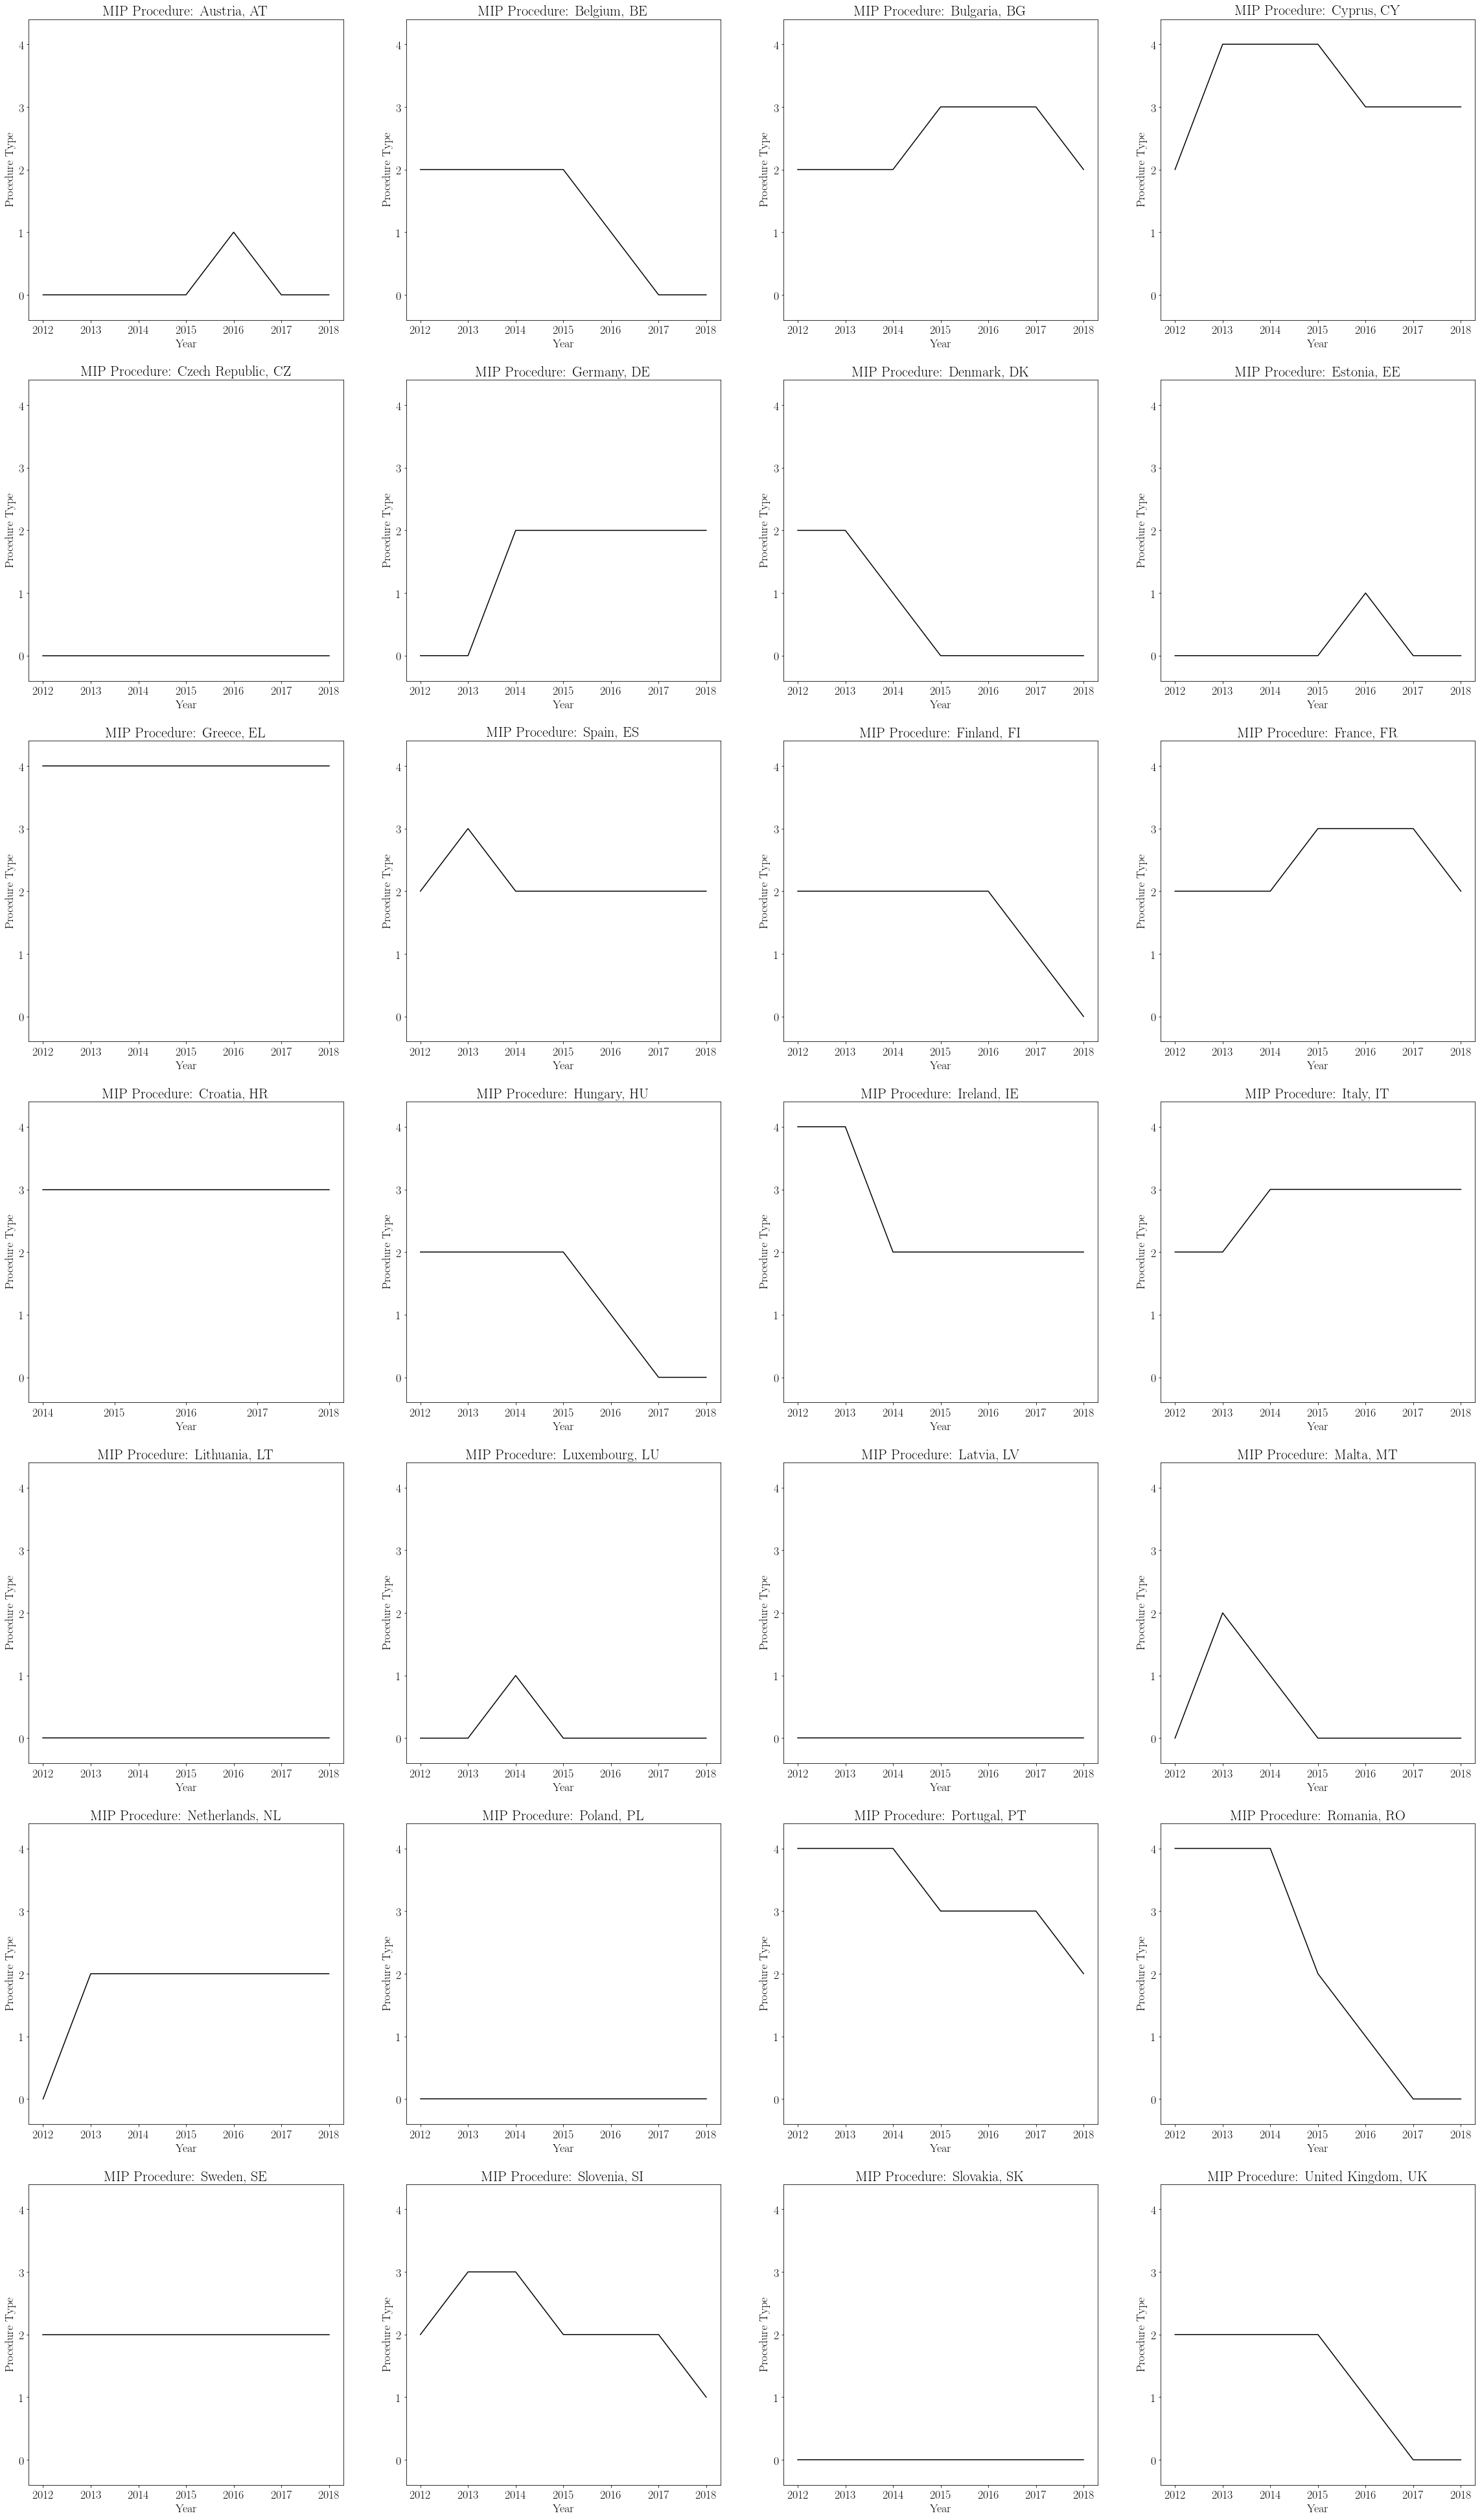

In [7]:
mip_country_year = mip_country_year()

<br>

In [8]:
mip_countries

,No In-depth review,No Imbalance,Imbalance,Excessive Imbalance,Programme countries
Year,,,,,
2012,"Austria, Czech Republic, Estonia, Germany, Lat...",NaN,"Belgium, Bulgaria, Cyprus, Denmark, Finland, F...",NaN,"Greece, Ireland, Portugal, Romania"
2013,"Austria, Czech Republic, Estonia, Germany, Lat...",NaN,"Belgium, Bulgaria, Denmark, Finland, France, H...","Slovenia, Spain","Cyprus, Greece, Ireland, Portugal, Romania"
2014,"Austria, Czech Republic, Estonia, Latvia, Lith...","Denmark, Luxembourg, Malta","Belgium, Bulgaria, Finland, France, Germany, H...","Croatia, Italy, Slovenia","Cyprus, Greece, Portugal, Romania"
2015,"Austria, Czech Republic, Denmark, Estonia, Lat...",NaN,"Belgium, Finland, Germany, Hungary, Ireland, N...","Bulgaria, Croatia, France, Italy, Portugal","Cyprus, Greece"
2016,"Czech Republic, Denmark, Latvia, Lithuania, Lu...","Austria, Belgium, Estonia, Hungary, Romania, U...","Finland, Germany, Ireland, Netherlands, Sloven...","Bulgaria, Croatia, Cyprus, France, Italy, Port...",Greece
2017,"Austria, Belgium, Czech Republic, Denmark, Est...",Finland,"Germany, Ireland, Netherlands, Slovenia, Spain...","Bulgaria, Croatia, Cyprus, France, Italy, Port...",Greece
2018,"Austria, Belgium, Czech Republic, Denmark, Est...",Slovenia,"Bulgaria, France, Germany, Ireland, Netherland...","Croatia, Cyprus, Italy",Greece


In [9]:
mip_country_year.head()

,2012,2013,2014,2015,2016,2017,2018
AT,0,0,0,0,1,0,0
BE,2,2,2,2,1,0,0
BG,2,2,2,3,3,3,2
CY,2,4,4,4,3,3,3
CZ,0,0,0,0,0,0,0


<br>

## MIP Scoreboard Indicators per Year - PCA

In [10]:
def mip_tips_h(target_year):
    study_units = []
    for i in tips_h:
        study_units.extend([i+"_"+e for e in set(pd.read_csv(path+"converted/"+i+".csv").unit)])
    study_units = sorted(set(study_units)); study_units.extend(["year", "label"])
    
    output = pd.DataFrame(index=sorted(dict_code2country.keys()), columns=study_units)
    
    for file in tips_h:
        df_temp = pd.read_csv(path+"converted/"+file+".csv"); df_temp.date = pd.to_datetime(df_temp.date)
        df_temp = df_temp[df_temp.date.dt.year == target_year]
        for ind, row in df_temp.iterrows():
            output.loc[row.geotime][file+"_"+row.unit]=row.value
    
    output.label = mip_country_year[target_year]
    output.year = target_year
    
    return(output)

In [11]:
mip_tips_h(2015).head()

,tipsbp10_PC_GDP_3Y,tipser10_PCH_1Y,tipser10_PCH_3Y,tipsex10_PCH_WRL_5Y,tipsfs10_MIO_NAC,tipsfs10_PCH_PRE,tipsfs10_PC_GDP,tipsgo10_MIO_NAC,tipsgo10_PC_GDP,tipsho10_INX_A_AVG,tipsho10_RCH_A_AVG,tipsii10_MIO_NAC,tipsii10_PC_GDP,tipslm10_PCH_3Y,tipslm60_PC_POP,tipslm60_PPCH_3Y,tipslm70_PC_ACT,tipslm70_PPCH_3Y,tipslm80_PC_ACT,tipslm80_PPCH_3Y,tipspc20_MIO_NAC,tipspc20_PC_GDP,tipspd20_MIO_NAC,tipspd20_PC_GDP,tipsun10_AVG_3Y,year,label
AT,2,-2.3,1.4,-12.23,1.4795e+06,-0.1,429.8,291911,84.8,100,3.3,7610,2.2,6.2,75.5,0.4,1.7,0.5,10.6,1.2,7430.5,2.2,427704,124.2,5.6,2015,0
BE,-0.7,-3.3,-1.6,-9.97,2.32131e+06,2.7,565.8,437541,106.5,100,1.2,188511,45.9,1.3,67.6,0.7,4.4,1,22.1,2.3,50917.8,12.4,743626,180.9,8.5,2015,2
BG,0.8,-3.5,-4.2,-9.01,161054,6.2,181.8,23217,26.2,100,1.6,-55822.8,-63,14.9,69.3,2.2,5.6,-1.2,21.6,-6.5,-290,-0.3,97835,110.5,11.2,2015,3
CY,-3.6,-6.5,-6.1,-19.96,310204,11.1,1748,19164,108,100,0.2,-25734,-145,-10.9,73.9,0.4,6.8,3.2,32.8,5.1,732.2,4.1,62724.3,353.5,15.7,2015,4
CZ,0,-0.7,-8,-18.69,9.05126e+06,8.1,196.9,1.83626e+06,40,100,3.8,-1.51294e+06,-32.9,0.1,74,2.4,2.4,-0.6,12.6,-6.9,15776,0.3,3.13172e+06,68.1,6.1,2015,0


In [12]:
def pca_target_year(target_year):
    Xy = mip_tips_h(target_year)
    
    features = Xy.columns[:-2]
    X = Xy.loc[:, features].values.astype(float)
    y = Xy.loc[:,['label']].values
    X = StandardScaler().fit_transform(X)
    
    pca = PCA(n_components=2)
    principalDf = pd.DataFrame(data = pca.fit_transform(X), columns = ['PC 1', 'PC 2'], index=Xy.index)
    finalDf = pd.concat([principalDf, Xy[['label']]], axis = 1)
    
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title('2 Component PCA for '+str(target_year))
    targets = range(0,5)
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'PC 1'], finalDf.loc[indicesToKeep, 'PC 2'], c = color, s = 50)
        for i in range(0, len(finalDf.loc[indicesToKeep, 'PC 1'])):
            ax.annotate(finalDf.loc[indicesToKeep, 'PC 1'].index[i], (finalDf.loc[indicesToKeep, 'PC 1'][i], finalDf.loc[indicesToKeep, 'PC 2'][i]))
    ax.legend(mip_countries.columns.values)
    ax.grid()
    

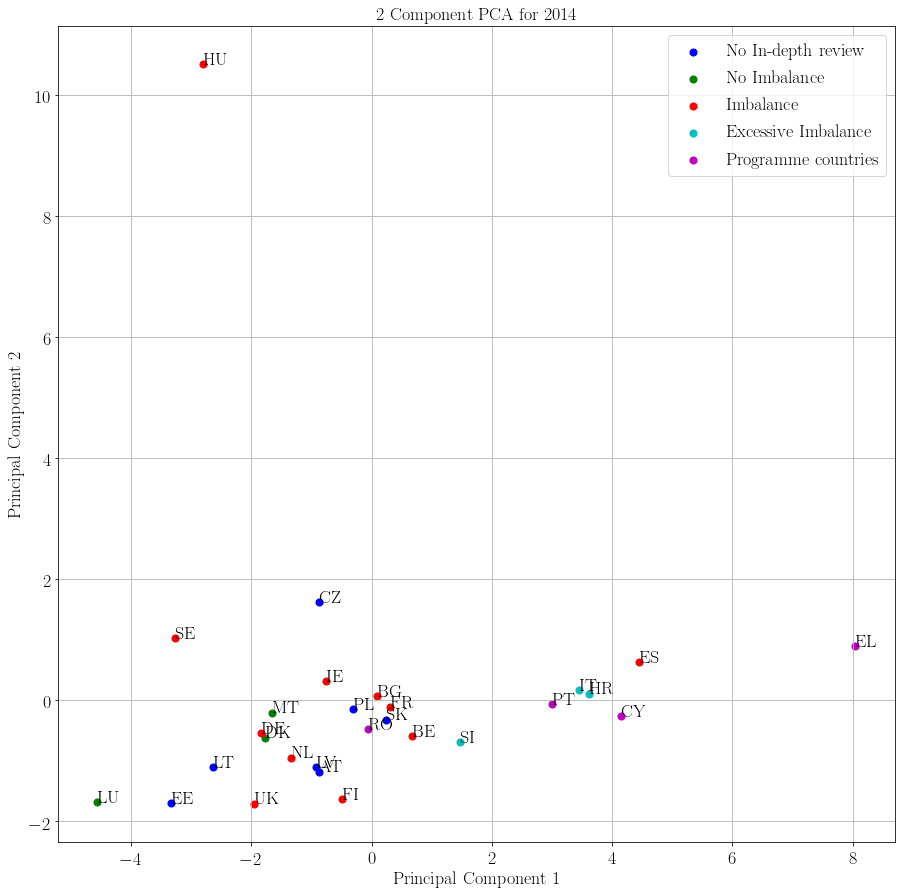

In [13]:
pca_target_year(2014)

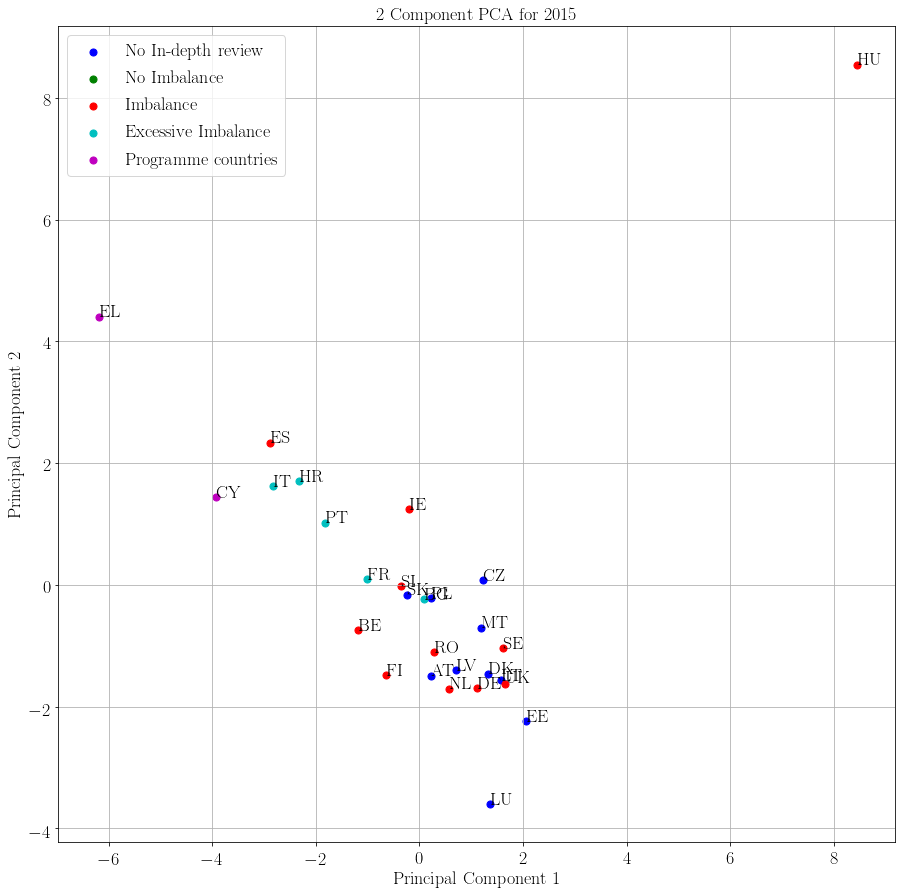

In [14]:
pca_target_year(2015)

<br>

# ML

## MIP Scoreboard Indicators per Year - KMeans

In [15]:
def ml_tips_h(): 
    output = pd.DataFrame()
    for year in mip_country_year.columns[:-1]:
        output = pd.concat([output, mip_tips_h(year)])
        
    return(output.dropna(axis=0).reset_index(drop=False))

In [19]:
def SVM_tips_h():

    ml_tips_h_temp = ml_tips_h()
    
    np.random.seed(42)
    
    #digits = load_digits()
    data = scale(ml_tips_h_temp.drop(["year", "label", "index"],axis=1).astype(float))
    
    n_samples, n_features = data.shape
    n_digits = len(np.unique(ml_tips_h_temp.label))
    labels = ml_tips_h_temp.label
    
    reduced_data = PCA(n_components=2).fit_transform(data)
    
    neigh = SVC(kernel='rbf', C=5, gamma="auto") #KNeighborsClassifier(n_neighbors=6)
    neigh.fit(reduced_data, np.array(labels.astype(int)))
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .01    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Obtain labels for each point in mesh. Use last trained model.
    #Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    f, axes = plt.subplots(figsize=(30, 15))
    im = axes.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='tab20', alpha= 0.5,
               aspect='auto', origin='lower')
    
    colors = [im.cmap(im.norm(value)) for value in np.unique(Z)]
    # create a patch (proxy artist) for every color 
    patches = [mpatches.Patch(color=colors[i], label=mip_countries.columns.values[i]) for i in range(len(np.unique(Z))) ]
    # put those patched as legend-handles into the legend
    axes.legend(handles=patches)
    
    marker_type = ["o", "s", "x", "D", "+"]
    for i in np.unique(labels):
        axes.plot(reduced_data[:, 0][labels==i], reduced_data[:, 1][labels==i], 'k.', color=colors[i], marker=marker_type[0], markersize=8)
        for ii in range(sum(labels==i)):
            axes.annotate(ml_tips_h_temp[ml_tips_h_temp.label==i]["index"].values[ii], (reduced_data[:, 0][labels==i][ii], reduced_data[:, 1][labels==i][ii]))
    
    axes.set_xlim(x_min, x_max)
    axes.set_ylim(y_min, y_max)
    axes.set_xticks(())
    axes.set_yticks(())
    plt.show()

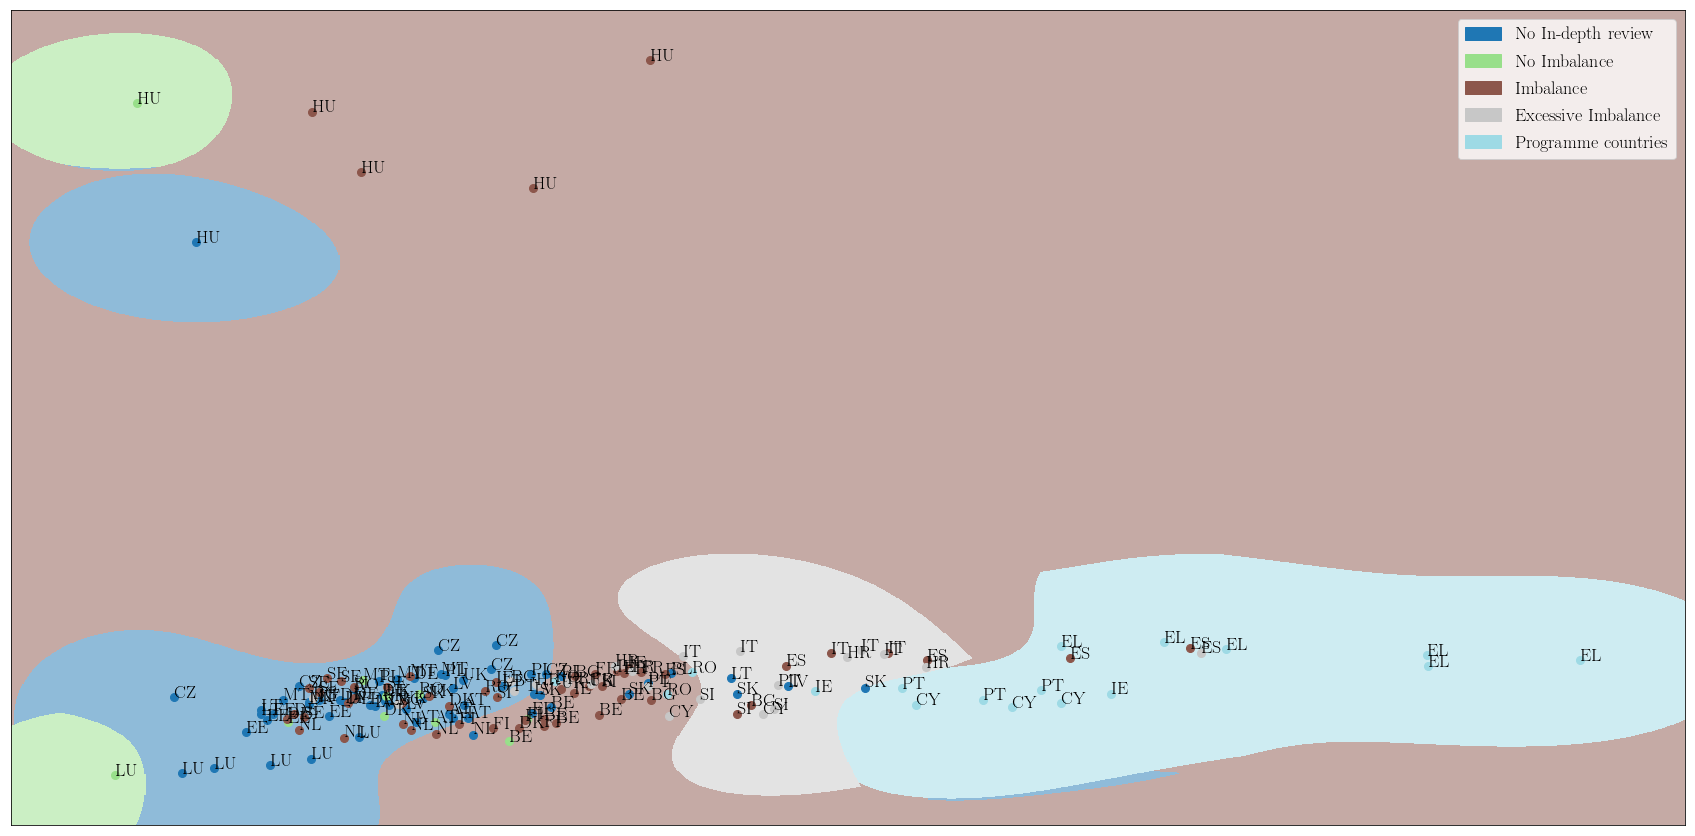

In [20]:
SVM_tips_h()

In [21]:
def countries_images_SVC():
    ml_tips_h_temp = ml_tips_h()
    
    np.random.seed(42)
    
    #digits = load_digits()
    data = scale(ml_tips_h_temp.drop(["year", "label", "index"],axis=1).astype(float))
    
    n_samples, n_features = data.shape
    n_digits = len(np.unique(ml_tips_h_temp.label))
    labels = ml_tips_h_temp.label
    
    reduced_data = PCA(n_components=2).fit_transform(data)
    
    neigh = SVC(kernel='rbf', C=5, gamma="auto") #KNeighborsClassifier(n_neighbors=6)
    neigh.fit(reduced_data, np.array(labels.astype(int)))
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .01    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Obtain labels for each point in mesh. Use last trained model.
    #Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ########################
    
    f, axes = plt.subplots(figsize=(30, 15))
    im = axes.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='tab20', alpha= 0.5,
               aspect='auto', origin='lower')
    
    colors = [im.cmap(im.norm(value)) for value in np.unique(Z)]
    # create a patch (proxy artist) for every color 
    patches = [mpatches.Patch(color=colors[i], label=mip_countries.columns.values[i]) for i in range(len(np.unique(Z))) ]
    # put those patched as legend-handles into the legend
    axes.legend(handles=patches)
    
    marker_type = ["o", "s", "x", "D", "+"]
    
    condition_with = (ml_tips_h_temp["index"]=="NL")
    axes.plot(reduced_data[:, 0][condition_with], reduced_data[:, 1][condition_with], color="white", marker=marker_type[0], markersize=8, linewidth=4)
    
    
    for i in np.unique(labels):
        condition_without = (labels==i) # & (ml_tips_h_temp["index"]!="NL")
        axes.plot(reduced_data[:, 0][condition_without], reduced_data[:, 1][condition_without], 'k.', color=colors[i], marker=marker_type[0], markersize=8)   
        for ii in range(sum(labels==i)):
            if ml_tips_h_temp[ml_tips_h_temp.label==i]["index"].values[ii]=="NL":
                axes.annotate(ml_tips_h_temp[ml_tips_h_temp.label==i]["index"].values[ii]+str(ml_tips_h_temp[ml_tips_h_temp.label==i]["year"].values[ii]), (reduced_data[:, 0][labels==i][ii], reduced_data[:, 1][labels==i][ii]))
    
    axes.set_xlim(-5, 0)
    axes.set_ylim(-3,3)#y_min, y_max)
    axes.set_xticks(())
    axes.set_yticks(())
    plt.show()
    
    ########################
    f, axes = plt.subplots(figsize=(30, 15))
    im = axes.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='tab20', alpha= 0.5,
               aspect='auto', origin='lower')
    
    colors = [im.cmap(im.norm(value)) for value in np.unique(Z)]
    # create a patch (proxy artist) for every color 
    patches = [mpatches.Patch(color=colors[i], label=mip_countries.columns.values[i]) for i in range(len(np.unique(Z))) ]
    # put those patched as legend-handles into the legend
    axes.legend(handles=patches)
    
    condition_with = (ml_tips_h_temp["index"]=="DE")
    axes.plot(reduced_data[:, 0][condition_with], reduced_data[:, 1][condition_with], color="white", marker=marker_type[0], markersize=8, linewidth=4)
    
    for i in np.unique(labels):
        condition_without = (labels==i) # & (ml_tips_h_temp["index"]!="NL")
        axes.plot(reduced_data[:, 0][condition_without], reduced_data[:, 1][condition_without], 'k.', color=colors[i], marker=marker_type[0], markersize=8)   
        for ii in range(sum(labels==i)):
            if ml_tips_h_temp[ml_tips_h_temp.label==i]["index"].values[ii]=="DE":
                axes.annotate(ml_tips_h_temp[ml_tips_h_temp.label==i]["index"].values[ii]+str(ml_tips_h_temp[ml_tips_h_temp.label==i]["year"].values[ii]), (reduced_data[:, 0][labels==i][ii], reduced_data[:, 1][labels==i][ii]))
    
    axes.set_xlim(-4,0)#(x_min, x_max)
    axes.set_ylim(-3,3)#y_min, y_max)
    axes.set_xticks(())
    axes.set_yticks(())
    plt.show()
    
    ########################3
    f, axes = plt.subplots(figsize=(30, 15))
    im = axes.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='tab20', alpha= 0.5,
               aspect='auto', origin='lower')
    
    colors = [im.cmap(im.norm(value)) for value in np.unique(Z)]
    # create a patch (proxy artist) for every color 
    patches = [mpatches.Patch(color=colors[i], label=mip_countries.columns.values[i]) for i in range(len(np.unique(Z))) ]
    # put those patched as legend-handles into the legend
    axes.legend(handles=patches)
    
    condition_with = (ml_tips_h_temp["index"]=="PT")
    axes.plot(reduced_data[:, 0][condition_with], reduced_data[:, 1][condition_with], color="white", marker=marker_type[0], markersize=8, linewidth=4)
    
    
    for i in np.unique(labels):
        condition_without = (labels==i) # & (ml_tips_h_temp["index"]!="NL")
        axes.plot(reduced_data[:, 0][condition_without], reduced_data[:, 1][condition_without], 'k.', color=colors[i], marker=marker_type[0], markersize=8)   
        for ii in range(sum(labels==i)):
            if ml_tips_h_temp[ml_tips_h_temp.label==i]["index"].values[ii]=="PT":
                axes.annotate(ml_tips_h_temp[ml_tips_h_temp.label==i]["index"].values[ii]+str(ml_tips_h_temp[ml_tips_h_temp.label==i]["year"].values[ii]), (reduced_data[:, 0][labels==i][ii], reduced_data[:, 1][labels==i][ii]))
    
    axes.set_xlim(x_min, x_max)
    axes.set_ylim(-3,3)#y_min, y_max)
    axes.set_xticks(())
    axes.set_yticks(())
    plt.show()

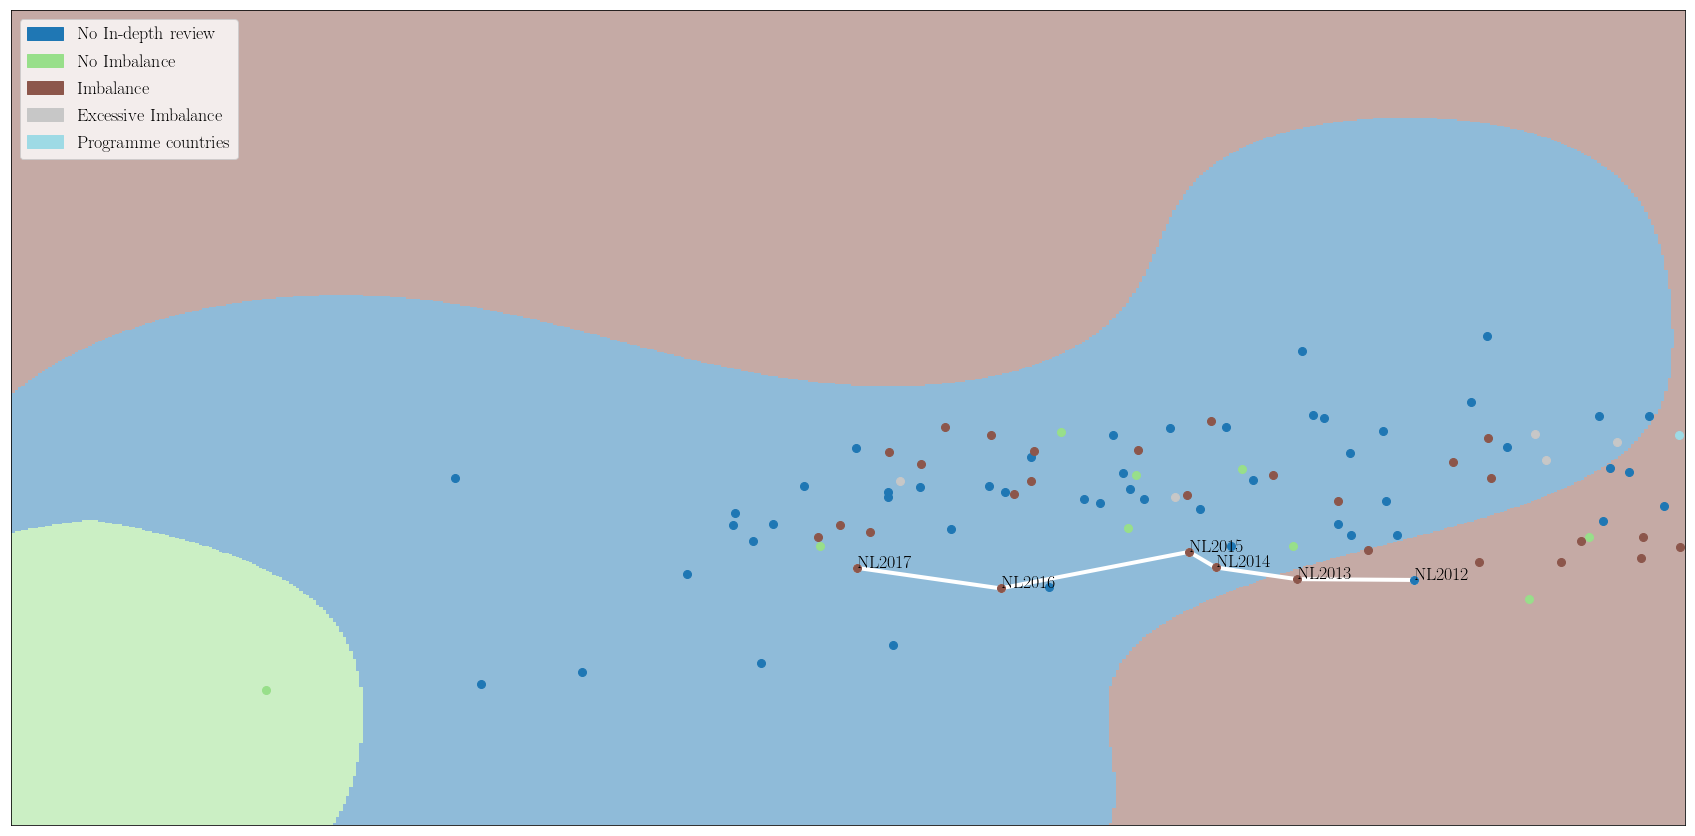

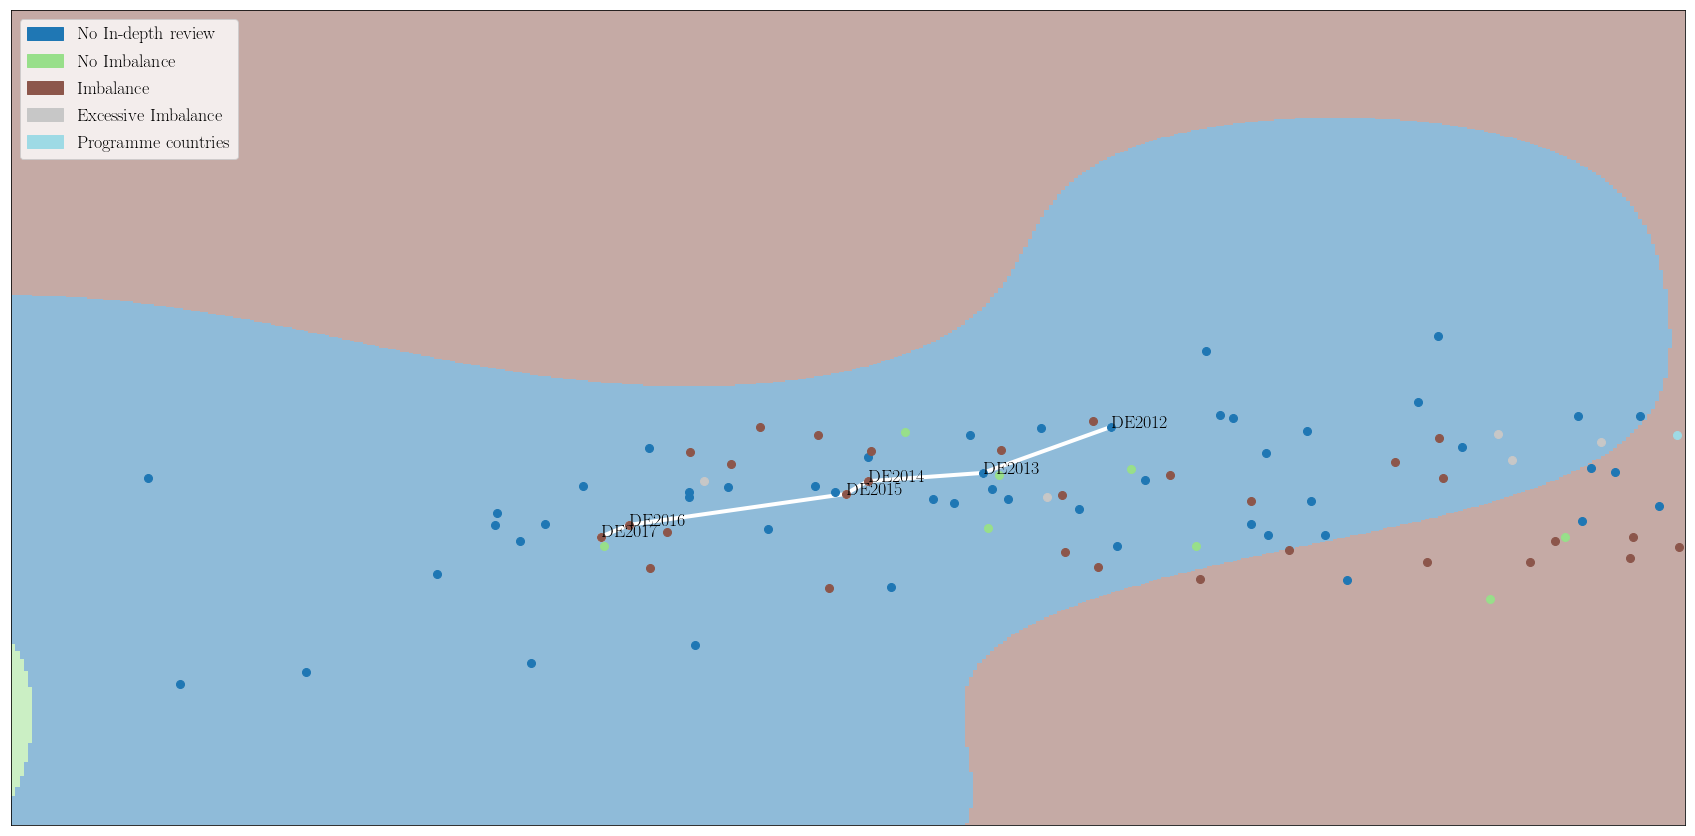

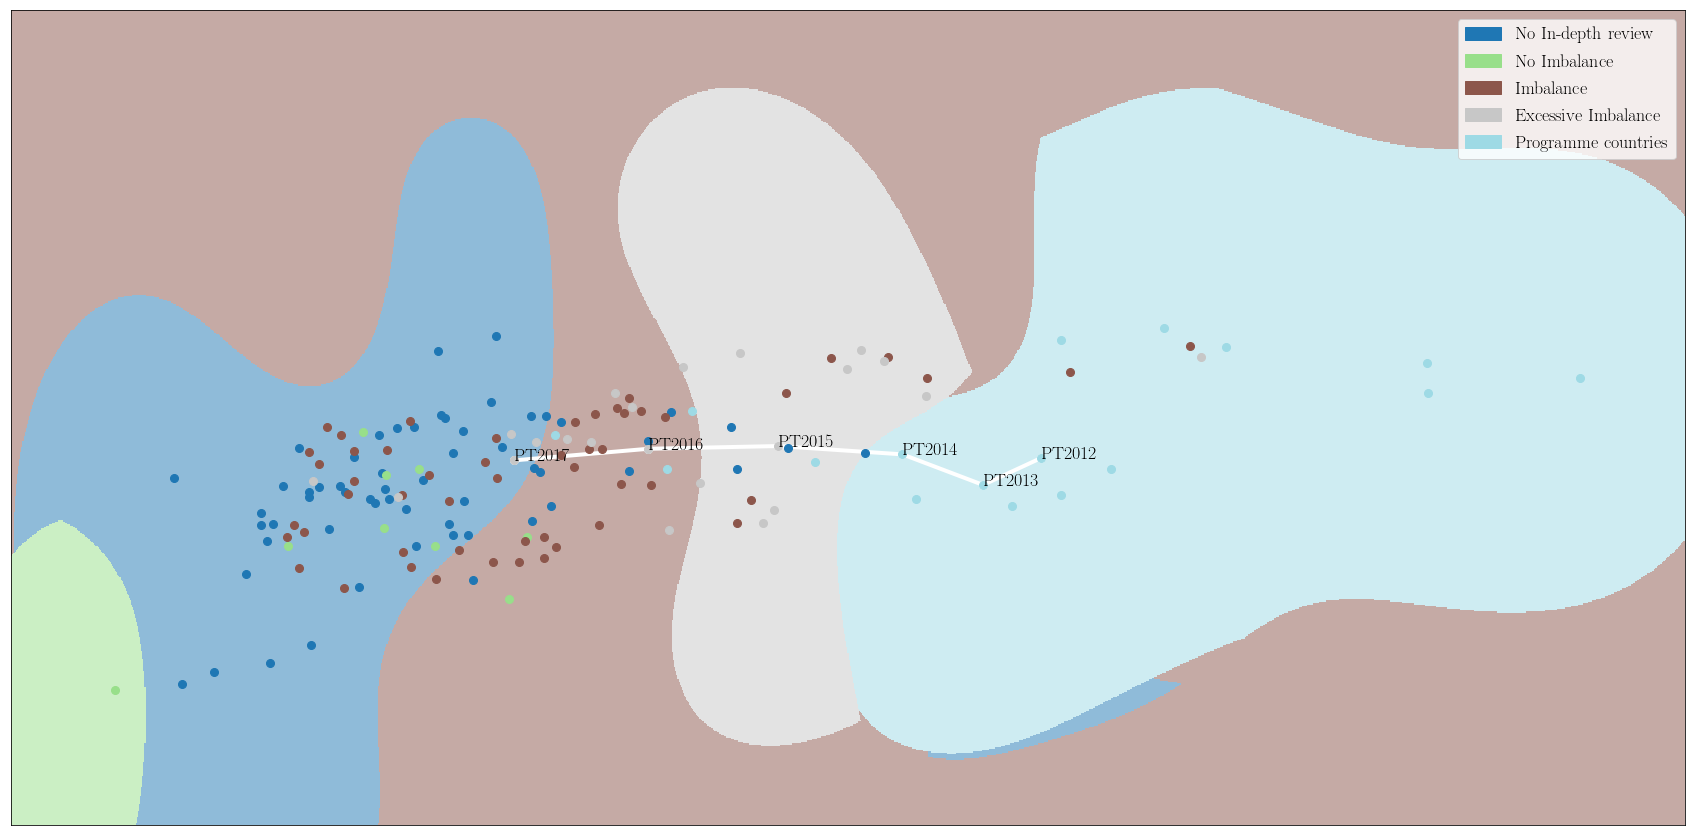

In [22]:
countries_images_SVC()

# Anomaly

	Headline indicators (t2020_h)
		Employment (t2020_he)
			Employment rate by sex, age group 20-64 (t2020_10) 
		Research and Development (t2020_hr)
			Gross domestic expenditure on R&D (GERD) (t2020_20)
		Climate change and energy (t2020_hc)
			Greenhouse gas emissions, base year 1990 (t2020_30)
			Share of renewable energy in gross final energy consumption (t2020_31) 
			Primary energy consumption (t2020_33)
			Final energy consumption (t2020_34)
			Greenhouse gas emissions in ESD sectors (t2020_35)
		Education (t2020_hd)
			Early leavers from education and training by sex (t2020_40)
			Tertiary educational attainment by sex, age group 30-34 (t2020_41)
		Poverty and social exclusion (t2020_hp)
			People at risk of poverty or social exclusion (t2020_50)
			People living in households with very low work intensity (t2020_51)
			People at risk of poverty after social transfers (t2020_52)
			Severely materially deprived people (t2020_53)
	

In [25]:
t2020_h_indicators = ["Employment rate by sex, age group 20-64", "Gross domestic expenditure on R\&D (GERD)",
                      "Greenhouse gas emissions, base year 1990", "Share of renewable energy in gross final energy consumption",
                      "Primary energy consumption", "Final energy consumption", "Greenhouse gas emissions in ESD sectors",
                      "Early leavers from education and training by sex", "Tertiary educational attainment by sex, age group 30-34", 
                      "People at risk of poverty or social exclusion", "People living in households with very low work intensity", 
                      "People at risk of poverty after social transfers", "Severely materially deprived people"]
t2020_h_files = ["t2020_10", "t2020_20", "t2020_30", "t2020_31", "t2020_33", "t2020_34", "t2020_35", "t2020_40", 
                 "t2020_41", "t2020_50", "t2020_51", "t2020_52", "t2020_53"]

In [33]:
t2020_h_shared = []
for file in t2020_h_files:
    try:
        t2020_h_shared.append(len(set(pd.read_csv(path+"converted/"+file+".csv").unit)))
    except AttributeError:
        t2020_h_shared.append(len(set(pd.read_csv(path+"converted/"+file+".csv").indic_eu)))

IndexError: index 24 is out of bounds for axis 0 with size 24

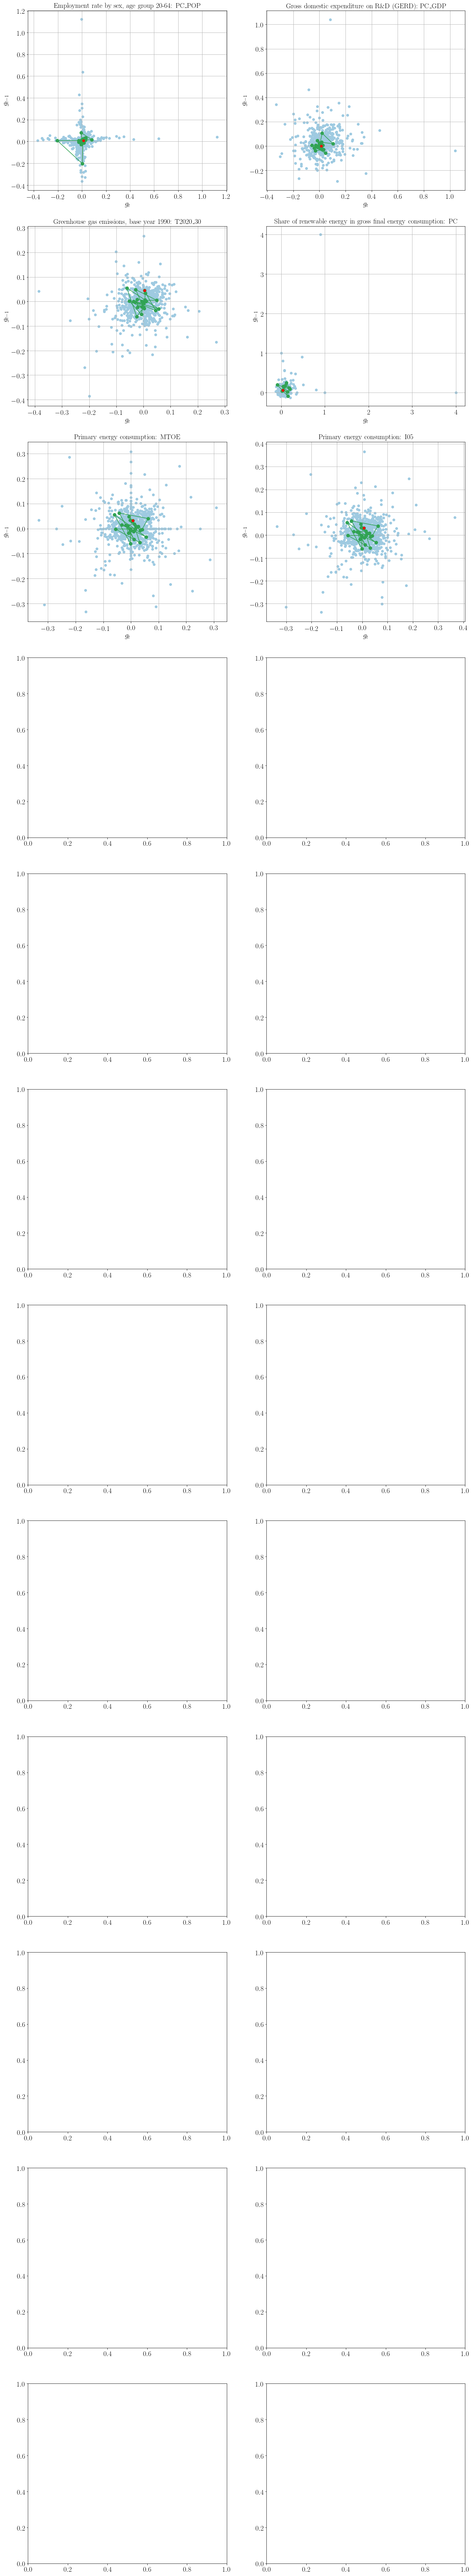

In [39]:
nr, nc = (12,2); counter = 0; bad = 0
f, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(10*nc, 10*nr)); axes = axes.flatten()
for i_file in range(len(t2020_h_files)):
    df_initial = pd.read_csv(path+"converted/"+t2020_h_files[i_file]+".csv")
    for i_image in range(t2020_h_shared[i_file]):
        try:
            df_out = pd.DataFrame()
            if "unit" in df_initial:
                temp_indicator = list(set(df_initial.unit))[i_image]
                df_in = df_initial[df_initial.unit == temp_indicator].copy()
            else:
                temp_indicator = list(set(df_initial.indic_eu))[i_image]
                df_in = df_initial[df_initial.indic_eu == temp_indicator].copy()
            for country in list(set(df_in.geotime)):
                temp = df_in[df_in.geotime==country].dropna()[["value"]].copy()
                temp_out = pd.DataFrame()
                temp_out["m1"] = temp.pct_change().iloc[2:,0].values
                temp_out["m2"] = temp.pct_change().iloc[1:-1,0].values
                temp_out["country"] = country
                df_out = pd.concat([df_out, temp_out])
            np_out = np.array(df_out.iloc[:,:2])
            np_nl = np_out[df_out.country=="NL"]
            nl_x, nl_y = np_nl[-1,:]
        
            axes[counter].scatter(np_out[:,0], np_out[:,1], color=plt.cm.get_cmap('tab20c')(2))
            axes[counter].plot(np_nl[:,0], np_nl[:,1], color=plt.cm.get_cmap('tab20c')(8), marker="o", markersize=8)   
            axes[counter].plot(nl_x, nl_y, 'k.', color="red", marker="o")
            axes[counter].set_xlabel(r"$g_{t}$")
            axes[counter].set_ylabel(r"$g_{t-1}$")
            axes[counter].set_title(t2020_h_indicators[i_file]+": "+temp_indicator.replace("_", "\_"))
            axes[counter].grid()
            counter += 1
        
        except IndexError:
            bad += 1
            f.delaxes(axes[nr*nc-bad])
            continue
    
plt.tight_layout()